In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("http://cluster.earlham.edu/~apc0013/Chicago_crime.csv")

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [4]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
labels = ["THEFT", "BATTERY","CRIMINAL DAMAGE","ASSAULT", "DECEPTIVE PRACTICE"]
df = df[df["Primary Type"].isin(labels)]

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
df.shape

(4162390, 22)

In [12]:
data = df[df["Date"] > pd.to_datetime("12/31/2017")]

In [13]:
data["hour"] = data["Date"].apply(lambda x: x.hour)

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


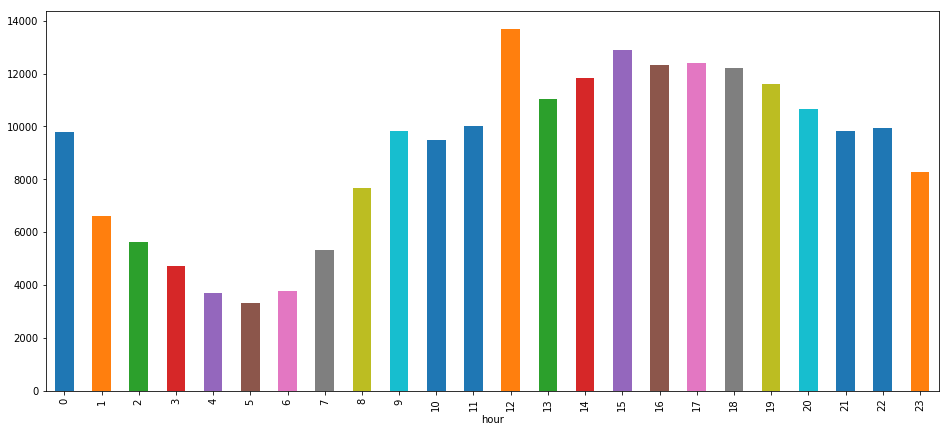

In [14]:
fig, ax = plt.subplots(figsize=(16,7))
data.groupby("hour").count()["Arrest"].plot(kind="bar", ax = ax)

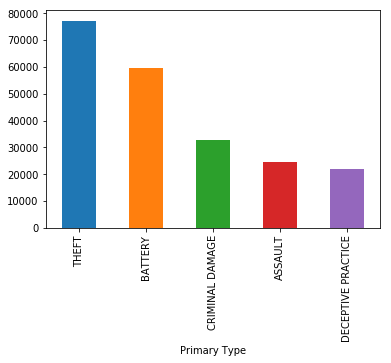

In [15]:
data.groupby("Primary Type").count()["Arrest"].sort_values(ascending = False).head(12).plot(kind="bar")

In [ ]:
data.groupby("Primary Type").count()["Arrest"].sort_values(ascending = False)

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

data.groupby(["hour", "Primary Type"]).count()["Arrest"].unstack('Primary Type').plot(kind = "bar", stacked = True, ax = ax)

